  # The Effect of Alcohol Consumption on Students' Grades
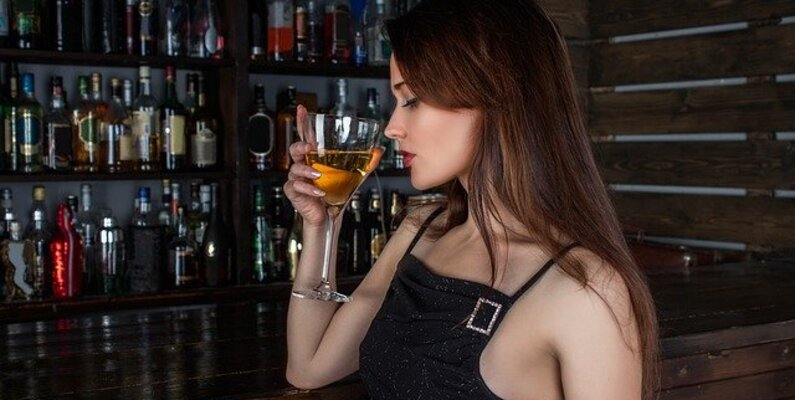


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('maths.csv')
df

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0    ...      4        3      4     1     1      3        6   5   6   6  
1    ...      5        3      3     1     1      3        4   5   5   6  
2    ...      4        3      2     2     3      3       10   7   8  10  
3    ...      3        2      2     1     1      5        2  15  14  15  
4    ...      4        3      2     1     2      5        4   6  10  10  
..   ...    ...      ...    ...   ...   ...    ...      ...  ..  ..  ..  
390  ...      5        5      4     4     5      4       11   9   9   9  
391  ...      2        4      5     3     4      2        3  14  16  16  
392  ...      5        5      3     3     3      3        3  10   8   7  
393  ...      4        4      1     3     4      5        0  11  12  10  
394  ...      3        2      3     3     3      5        5   8   9   9  

[395 rows x 33 columns]


About the Dataset: "The Effect of Alcohol Consumption on Students' Grades"

This data presents the educational achievement of 395 students  from two Portuguese secondary schools. The data attributes include student grades, demographic, social and school related features and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics. G3 is the final year grade (issued in the 3rd year), while G1 and G2 correspond to the 1st and 2nd year grades.

There are certainly lots of insights to draw from the data but this presentation seeks to answer ONE IMPORTANT QUESTION:
* Does alcohol consumption have a negative influence on students' grades in general?

    Attributes with their Description (Domain)
sex: student’s sex (binary: female or male)
age: student’s age (numeric: from 15 to 22)
school: student’s school (binary: Gabriel Pereira or Mousinho da Silveira) 
address: student’s home address type (binary: urban or rural)
Pstatus: parent’s cohabitation status (binary: living together or apart)
Medu: mother’s education (numeric: from 0 to 4); 0 – none, 1 – primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education.
Fedu: father’s education (numeric: from 0 to 4); same as Medu
Mjob: mother’s job (nominal); teacher, health care related, civil services (e.g. administrative or police), at home or other.
Fjob: father’s job (nominal); same as Mjob
Guardian: student’s guardian (nominal: mother, father or other)
Famsize: family size (binary: ≤ 3 or > 3)
Famrel: quality of family relationships (numeric: from 1 – very bad to 5 – excellent)
Reason: reason to choose this school (nominal: close to home, school reputation, course preference or other)
Traveltime: home to school travel time (numeric: 1 – < 15 min., 2 – 15 to 30 min., 3 – 30 min. to 1 hour or 4 – > 1 hour).
Studytime: weekly study time (numeric: 1 – < 2 hours, 2 – 2 to 5 hours, 3 – 5 to 10 hours or 4 – > 10 hours)
Failures: number of past class failures (numeric: n if 1 ≤ n < 3, else 4)
Schoolsup: extra educational school support (binary: yes or no)
Famsup: family educational support (binary: yes or no)
Activities: extra-curricular activities (binary: yes or no)
Paidclass: extra paid classes (binary: yes or no)
Internet: Internet access at home (binary: yes or no)
Nursery: attended nursery school (binary: yes or no)
Higher: wants to take higher education (binary: yes or no)
Romantic: in a romantic relationship (binary: yes or no)
Freetime: free time after school (numeric: from 1 – very low to 5 – very high)
Gout: going out with friends (numeric: from 1 – very low to 5 – very high)
Walc: weekend alcohol consumption (numeric: from 1 – very low to 5 – very high)
Dalc: weekday alcohol consumption (numeric: from 1 – very low to 5 – very high)
Health: current health status (numeric: from 1 – very bad to 5 – very good)
Absences: number of school absences (numeric: from 0 to 93)
G1: first year grade (numeric: from 0 to 20)
G2: second year grade (numeric: from 0 to 20)
G3: final year grade (numeric: from 0 to 20)


    Data Cleaning

In [3]:
df.drop_duplicates(inplace=True)  ## no duplicates
df.shape

(395, 33)

In [4]:
total_null_values = pd.isnull(df).sum().sum()  ## no null values
total_null_values

0

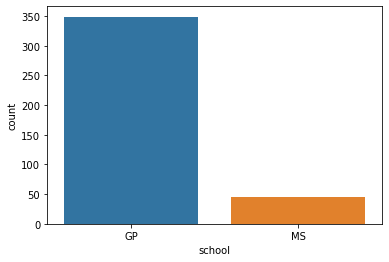

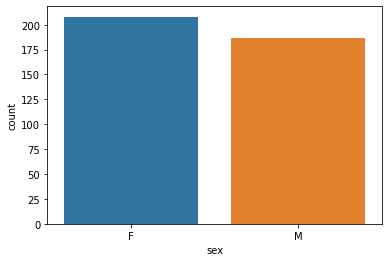

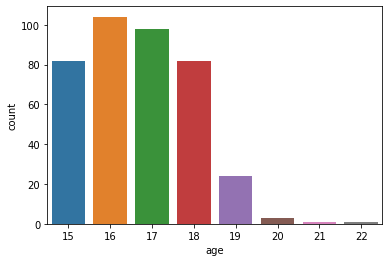

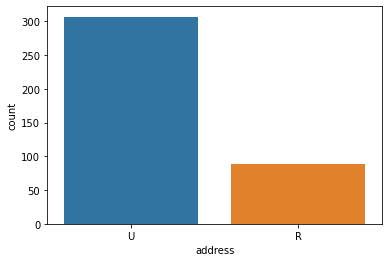

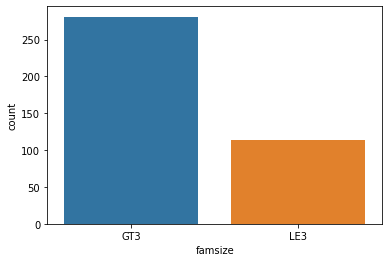

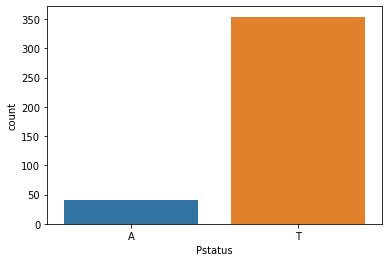

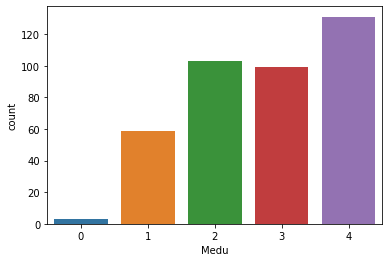

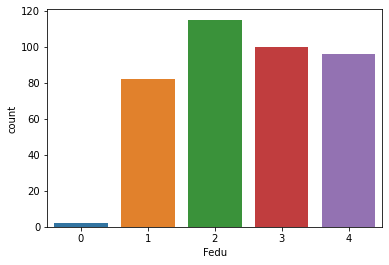

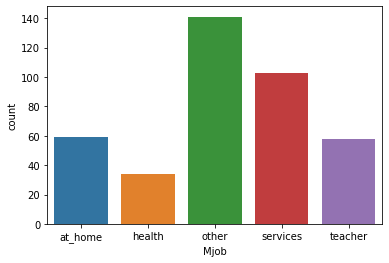

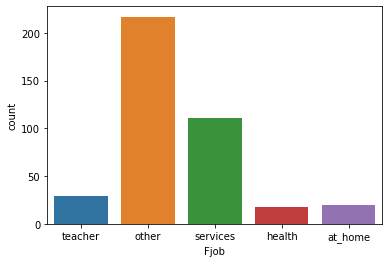

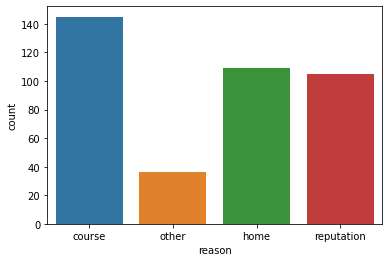

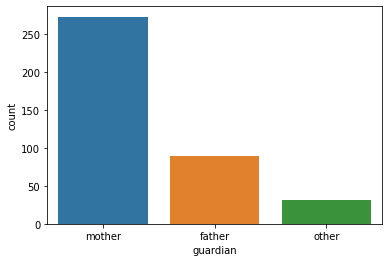

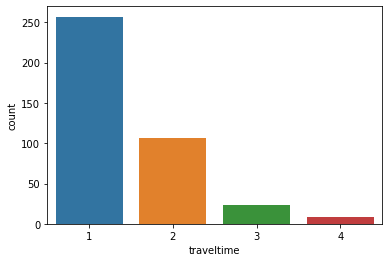

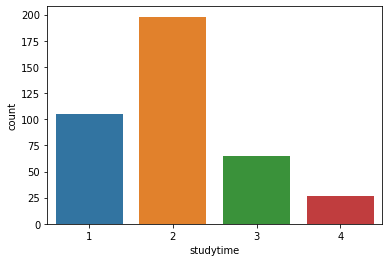

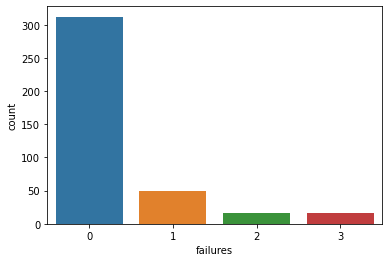

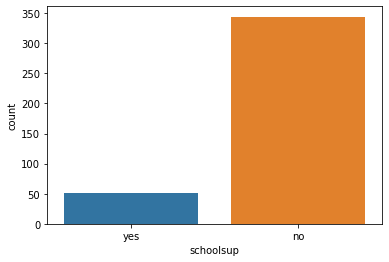

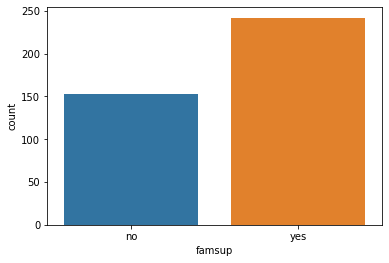

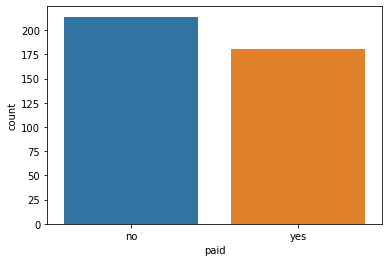

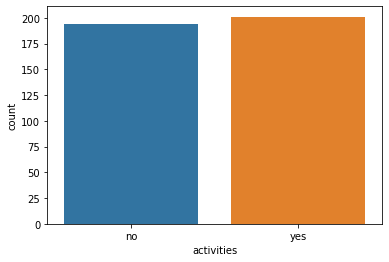

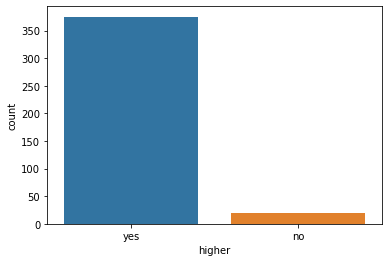

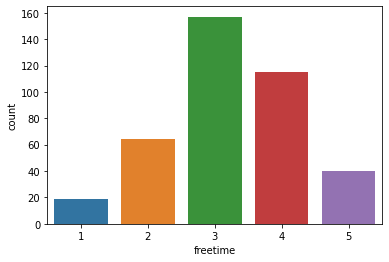

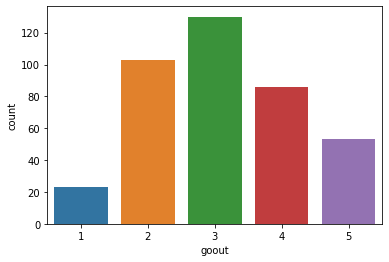

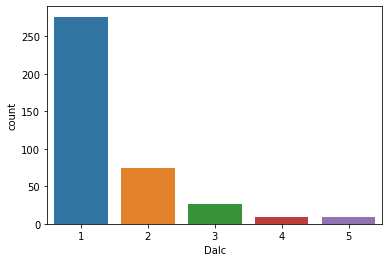

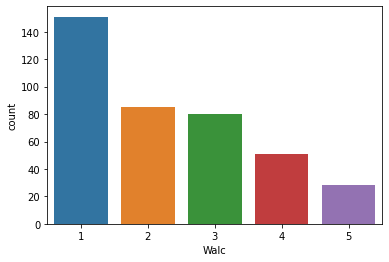

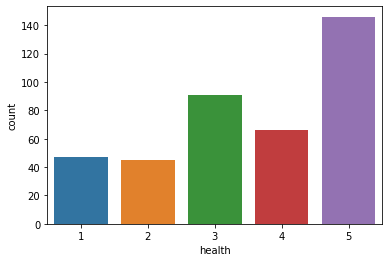

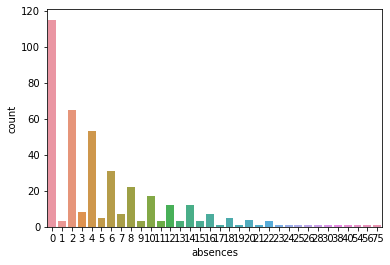

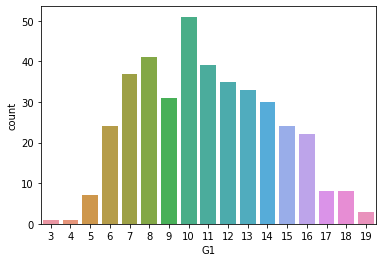

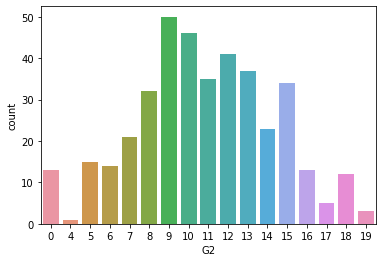

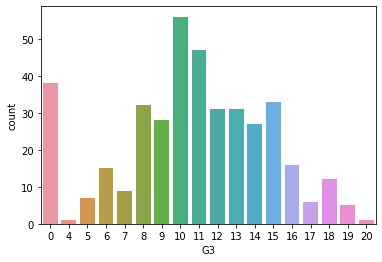

In [5]:
for column in df.columns[:33]:
    sns.countplot(data=df, x=column)
    plt.show()

Summary (from sns plots)
* Most of the students are in Gabriel Pereira
* The genders are quite balanced
* most of the students are between 15 and 18 yrs
* 1/4 of the students live in a rural area
* 2/3 of the students live in a family greater than 3
* most of the parents live together
* most of the parents completed primary education
* "other" and "service" are the most common jobs for both parents, more stay at home mom than dad
* students chose their schools because of curriculum, distance and reputation
* the guardian is the mother by default, not really revelent because most of the parents live together
* travel time, most of the students live within 15 minutes of their schools, nearly all within 30 minutes
* most students study less than 5 hours per week
* most students haven't failed any class
* only a small number of students receive school support
* more students receive support from their family than not
* a little less than half of the student take additional paid class
* half of the students have after class activities
* 3/4 of students take nursing classes
* most students want to receive higher education
* most students have internet
* one third of the students are in a romantic relationship
* family relationship is mostly good
* the free time is a normal distribution
* the going out time is also a normal distribution
* most of the students drink very few alcohol during the week,
* a little more during the weekend
* students' average health is quite good
* most of the students have very few absences

As shown below, it was observed that the grades from both schools generally dropped over the years from G1 to G3. However it dropped less for Gabriel Perera students.

In [6]:
# MEAN Scores per school for each year
gp_1 = round(df[df.school == 'GP']['G1'].mean(), 2) #mean score for all students from GP for 1st year, etc.
gp_2 = round(df[df.school == 'GP']['G2'].mean(), 2)
gp_3 = round(df[df.school == 'GP']['G3'].mean(), 2)

ms_1 = round(df[df.school == 'MS']['G1'].mean(), 2)
ms_2 = round(df[df.school == 'MS']['G2'].mean(), 2)
ms_3 = round(df[df.school == 'MS']['G3'].mean(), 2)

print(f'The mean score, over 20, of Gabriel Pereira students for the three periods are: {gp_1}, {gp_2}, and {gp_3}')
print(f'while the mean of Mousinho de Silvera students are: {ms_1}, {ms_2}, and {ms_3}.')

The mean score, over 20, of Gabriel Pereira students for the three periods are: 10.94, 10.78, and 10.49
while the mean of Mousinho de Silvera students are: 10.67, 10.2, and 9.85.


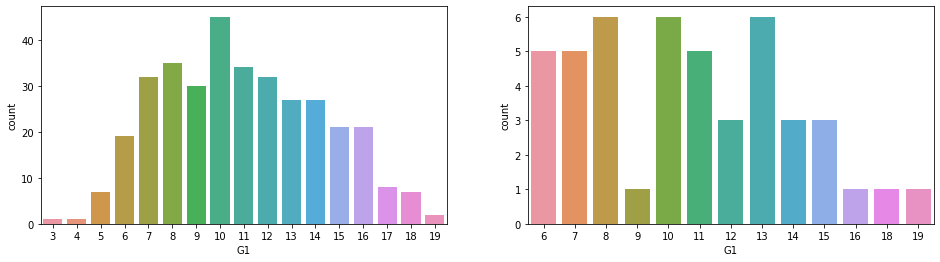

In [7]:
fig, ax = plt.subplots(1,2, figsize=(16,4))

sns.countplot(ax=ax[0], data=df[df.school == 'GP'], x='G1')
sns.countplot(ax=ax[1], data=df[df.school == 'MS'], x='G1')

plt.show()

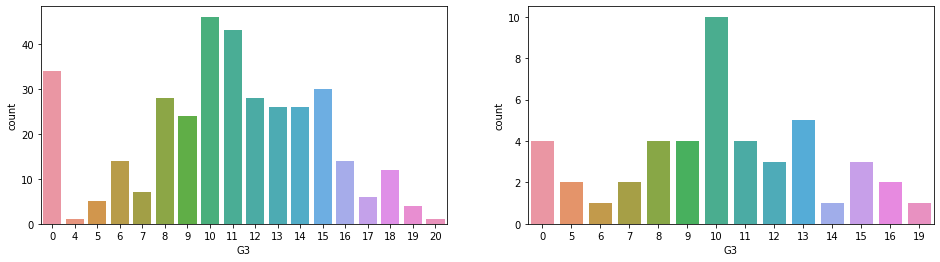

In [8]:
fig, ax = plt.subplots(1,2, figsize=(16,4))

sns.countplot(ax=ax[0], data=df[df.school == 'GP'], x='G3')
sns.countplot(ax=ax[1], data=df[df.school == 'MS'], x='G3')

plt.show()

Now back to our question! -- Does alcohol have a negative influence on students' grades in general?
Does alcohol have an influence on the drop in the grades?

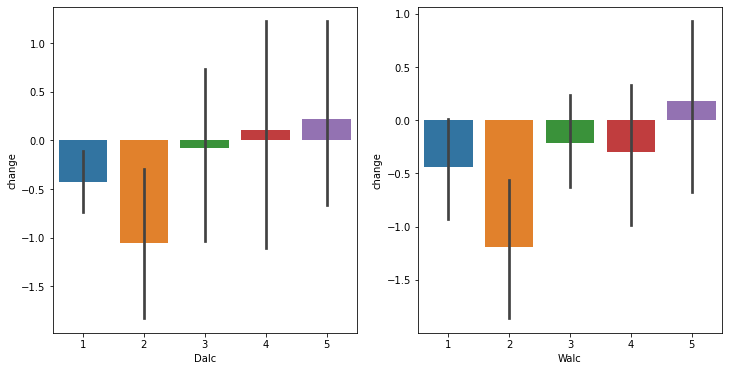

In [9]:
df['change'] = df['G3'] - df['G1']
#a negative value indicates that G3 < G1, i.e. the grade dropped from G1 to G3 and vice versa.

fig, ax = plt.subplots(1,2, figsize=(12,6))

sns.barplot(ax=ax[0], data=df, x='Dalc', y='change')
sns.barplot(ax=ax[1], data=df, x='Walc', y='change')

plt.show()

Conclusion:
* The students with the lowest alcohol consumption seemed to have the biggest drop in their grades. Therefore, it may be concluded that alcohol consumption did not have a negative influence on the students' grades.